In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr

In [2]:
path = '/home/daniel/.local/share/WSJT-X - test/fmt.all'
starting_day = '2018-11-26'
frequency = 10706e6

In [3]:
def load_data(path, starting_day, frequency):
    with open(path) as f:
        data = [(s.replace('*', ' ').split()[0], float(s.split()[4])) for s in f.readlines()]
    timestamps = np.array([np.datetime64(starting_day + 'T' + d[0]) for d in data])
    # correct rollover
    timestamps += np.concatenate(([0], np.cumsum(np.diff(np.array(timestamps)) < np.timedelta64(0)))) * np.timedelta64(3600*24)
    ppb = [(d[1]-500)/frequency*1e9 for d in data]
    data = xr.DataArray(ppb, coords = {'time':timestamps}, dims = ('time'))
    data.attrs['units'] = 'ppb'
    data.name = 'Frequency offset'
    return data

In [4]:
ppb = load_data(path, starting_day, frequency)
ppb[ppb > -26] = np.nan # filter some invalid measurements
ppb[ppb < -40] = np.nan
xr.Dataset({'ppb': ppb}).to_netcdf('ppb.nc')

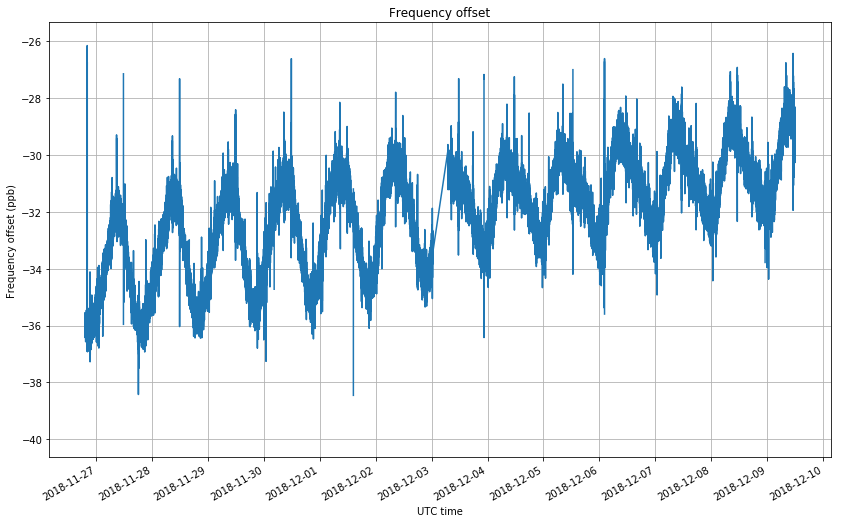

In [5]:
plt.figure(figsize=(14,8), facecolor='w')
ppb.plot()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid()
plt.title('Frequency offset')
plt.xlabel('UTC time')
plt.ylabel('Frequency offset (ppb)');